# 3.sentiment Analysis

## 3.1-SentimentAnalyzer de NLTK:


**Prmemirenet en va exploiter un outil pour analyses des sentiment en utilisent SentimentAnalyzer de package NLTK**

In [1]:
import pandas as pd 
from matplotlib.pyplot import figure
import numpy as np
import matplotlib.pyplot as plt

In [63]:
!pip install vaderSentiment

     |████████████████████████████████| 125 kB 671 kB/s eta 0:00:01


In [2]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [3]:
# creation d'un objet de SentimentIntensityAnalyzer
sentiment_analyzer = SentimentIntensityAnalyzer()
result = sentiment_analyzer.polarity_scores('I do not dislike horror movies')

In [66]:
result

{'neg': 0.0, 'neu': 0.436, 'pos': 0.564, 'compound': 0.6348}

Le résultat est un dictionnaire qui contient des informations sur la polarité des sentiments dans une phrase ou un texte. Les trois premières valeurs du dictionnaire (neg, neu, pos) représentent les parties négative, neutre et positive du texte. La dernière valeur représente le score composé, qui est un score global normalisé de négativité ou de positivité, allant de -1 à +1. En fonction de la valeur du score composé, on peut considérer que les phrases ayant un score supérieur à 0 sont positives, tandis que celles ayant un score inférieur à 0 sont négatives.

#### Load  data 

In [4]:
data=pd.read_json('data_final_vr.json')

In [ ]:
# data.head(2)

Maintenant, nous allons essayer d'analyser les avis de chaque hôtel pour ensuite calculer la moyenne des scores des avis par hôtel. Ensuite, nous comparerons cette moyenne avec le classement de l'hôtel correspondant.

In [6]:
df=pd.DataFrame()

df['rating']=data['rating']


In [43]:
m=len(data)
hotels_scors=[]
for i in range(m):
    n=len(data['reviews'][i])
    scors=[]
    for j in range(n):
        result = sentiment_analyzer.polarity_scores(data['reviews'][i][j])
#         print(result['compound'])
        scors.append(result['compound'])
    scor=sum(scors)/len(scors)
    hotels_scors.append(scor)

# le scor donnees par SentimentIntensityAnalyzer pour chaque hotel

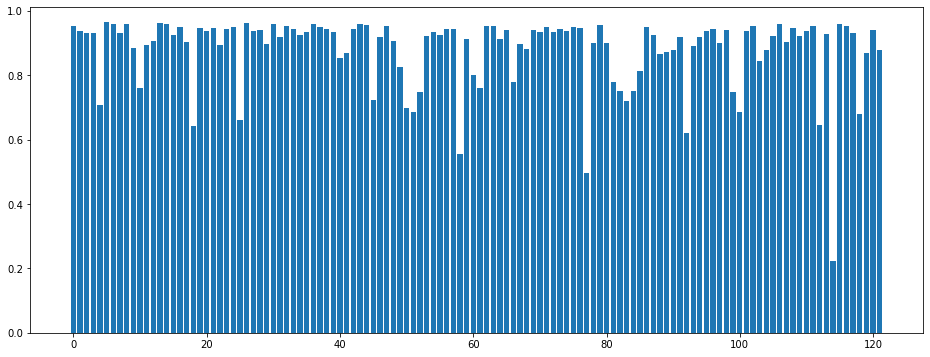

In [92]:
ind=[]
fig = plt.figure(figsize=(16, 6))
[ind.append(i) for i in range(len(hotels_scors)) ]
ind
plt.bar(ind,hotels_scors) 
plt.show()

# Rating de chaque hotel

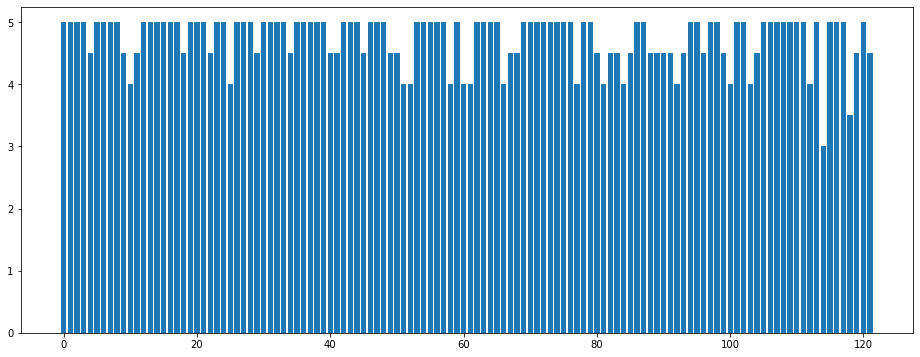

In [93]:
from matplotlib.pyplot import figure

import numpy as np
import matplotlib.pyplot as plt
ind=[]
fig = plt.figure(figsize=(16, 6))
[ind.append(i) for i in range(len(hotels_scors)) ]

plt.bar(ind,df['rating'])
plt.show()

## 3.1-Sentiment Analysis with bert

In [6]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
import torch
import re

2024-02-27 15:45:50.378747: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-27 15:45:50.378795: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-27 15:45:50.380149: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-02-27 15:45:50.388634: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-02-27 15:45:51.493307: W tensorflow/compiler/tf2

création d'un tokenizer de mots.
    
Ensuite, nous allons utiliser un modèle BERT pré-entraîné pour l'analyse des sentiments. Ce modèle accepte des tokens en entrée et renvoie un score compris entre 1 et 5.


In [106]:
tokenizer = AutoTokenizer.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

model = AutoModelForSequenceClassification.from_pretrained('nlptown/bert-base-multilingual-uncased-sentiment')

Downloading:   0%|          | 0.00/669M [00:00<?, ?B/s]

In [ ]:
de meme manier on va fair la tokinazation de chaque review, puit on va passe le token ou model.
et calculer la moyen des scors des reviews par hotel et en va la comparer avec le rating de la meme hotel 

In [111]:
m=len(data) 
hotels_scors_model=[]
for i in range(m):
    n=len(data['reviews'][i])
    scors=[]
    for j in range(n):
        tokens = tokenizer.encode(data['reviews'][i][j], return_tensors='pt')
        result = model(tokens)
        scors.append(int(torch.argmax(result.logits)))
    scor=sum(scors)/len(scors)
    hotels_scors_model.append(scor)

# le scor donnees par Bert model  pour chaque hotel

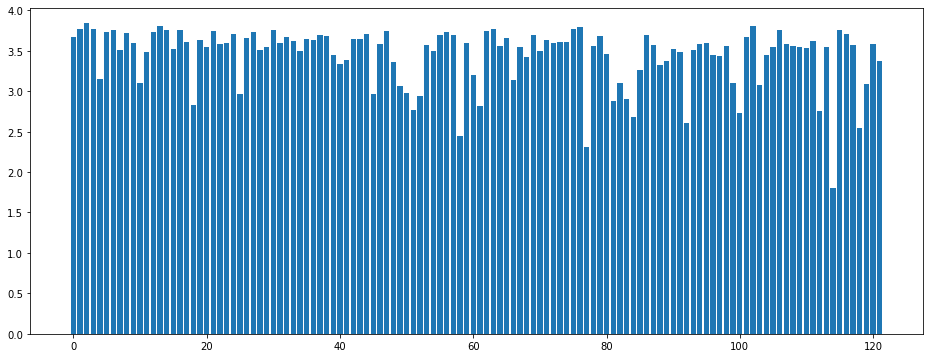

In [114]:
ind=[]
fig = plt.figure(figsize=(16, 6))
[ind.append(i) for i in range(len(hotels_scors_model)) ]
plt.bar(ind,hotels_scors_model)
plt.show()

In [7]:
AutoModelForSequenceClassification_=hotels_scors_model

In [4]:
import json

with open("hotels_scors_model.json", "w") as outfile:
    json.dump(hotels_scors_model, outfile)
# dat=pd.read_json('links.json')

In [1]:
# import torch
# from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

# tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
# model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased")


Some other analyses that will be performed for hotel sentiment reviews using Tableau based on this data and the columns that will be generated for top/bad words :

    Sentiment Over Time: Plot the sentiment scores over time using line charts for each hotels

    Top positive Keywords (Top neg Keywords as well) : Identify the most Scoring words 
    
    
    Sentiment by Location: Analyze the sentiment based on different locations or specific amenities using geographic maps or stacked bar charts. This can provide insights into how sentiment varies across different hotel locations or facilities.


    Sentiment Impact on Ratings: Analyze the correlation between sentiment scores and overall ratings given by customers. This can help determine if there is a strong relationship between sentiment and the overall customer satisfaction expressed through ratings.


In [136]:
# find op/bad words 

In [1]:
from gensim.utils import tokenize
from gensim.parsing.porter import PorterStemmer
import numpy as np
m=len(data)
txt=''
for i in range(m):
    n=len(data['reviews'][i])
    scors=[]
    var=np.array((data['reviews'][i]))#.decode("utf-8"))
    var=var.flatten() 
    v=''.join(var)
    txt+=v
    tokens=list(tokenize(v, deacc=False))
# # tokens
# v

In [239]:
tokens=list(tokenize(txt, deacc=False))
porter_stemmer = PorterStemmer()
# Get the stemmed_tokens

tokens_stemmer = [porter_stemmer.stem(word) for word in tokens]

In [242]:
len(tokens_stemmer)

2411838

In [243]:
tab=[]
for i in tokens_stemmer:
    result = sentiment_analyzer.polarity_scores(i)
    tab.append([i,result['neg'],result['pos'],result['compound']])

In [244]:
df11=pd.DataFrame(tab)

In [1]:
# df11.dropna()

In [274]:
df11.drop(df11.index[(df11[3] == 0)],axis=0,inplace=True)

In [281]:
df11.to_csv('pos_and_neg_wrd.csv')

In [292]:
df12=pd.read_csv('pos_and_neg_wrd.csv')

In [294]:
df12=df12.drop(labels="Unnamed: 0", axis=1)

In [308]:
df12

,0,1,2,3
0,great,0.0,1.0,0.6249
1,super,0.0,1.0,0.5994
2,help,0.0,1.0,0.4019
3,thank,0.0,1.0,0.3612
4,perfect,0.0,1.0,0.5719
...,...,...,...,...
162238,nice,0.0,1.0,0.4215
162239,excel,0.0,1.0,0.4588
162240,great,0.0,1.0,0.6249
162241,clean,0.0,1.0,0.4019


In [309]:
df12['0'].describe()

count     162243
unique       712
top         help
freq        9765
Name: 0, dtype: object

In [312]:
dff=pd.DataFrame()
dff=df12.drop_duplicates(subset=['0']) 

In [333]:
dff

,0,1,2,3
0,great,0.0,1.0,0.6249
1,super,0.0,1.0,0.5994
2,help,0.0,1.0,0.4019
3,thank,0.0,1.0,0.3612
4,perfect,0.0,1.0,0.5719
...,...,...,...,...
161086,hardier,1.0,0.0,-0.1531
161154,careless,1.0,0.0,-0.3612
161207,lowland,1.0,0.0,-0.0258
161694,feudal,1.0,0.0,-0.2023


In [314]:
dff['0'].describe()

count       712
unique      712
top       great
freq          1
Name: 0, dtype: object

In [334]:
dff.to_csv('Top_word.csv')

In [335]:
dff=pd.read_csv('Top_word.csv')

In [337]:
dff.drop(labels="Unnamed: 0", axis=1)

,0,1,2,3
0,great,0.0,1.0,0.6249
1,super,0.0,1.0,0.5994
2,help,0.0,1.0,0.4019
3,thank,0.0,1.0,0.3612
4,perfect,0.0,1.0,0.5719
...,...,...,...,...
707,hardier,1.0,0.0,-0.1531
708,careless,1.0,0.0,-0.3612
709,lowland,1.0,0.0,-0.0258
710,feudal,1.0,0.0,-0.2023


In [ ]:
# le score est sur l'echele de linterval  [-1, 1]

In [354]:
L_1=[]
L_1=list(dff['3'])
LL_1[:]=L_1[:]

In [356]:
top_L_1=[]

for i, j in enumerate(L_1):
    
    top_L_1.append([min(LL_1),LL_1.index(min(LL_1))+i])
    
    aa.pop(aa.index(min(LL_1)))

In [357]:
(top_L_1)

t__p=top_L_1[:100]

tab1=[]

for i in range(100):
    
    tab1.append(t__p[i][0])

In [363]:
L_2=[]

for i in range(100):
    
    k=tp[i][1]
    
    L_2.append(dff['0'][k-1])

In [360]:
df1=pd.DataFrame(tab1)

d=pd.DataFrame()

d['scors_of_word']=df1

scr=pd.DataFrame(L_2)

d['key_pos_word']=scr

In [361]:
d

,scors_of_word,key_pos_word
0,-0.6908,vip
1,-0.6808,luckier
2,-0.6597,cancer
3,-0.6597,inhibit
4,-0.6486,sceptic
...,...,...
95,-0.4767,vision
96,-0.4767,beaut
97,-0.4767,cock
98,-0.4767,relentless


In [362]:
d.to_csv('Top_neg_wrd.csv')

In [95]:
df['rating'].describe()

count    122.000000
mean       4.733607
std        0.402392
min        3.000000
25%        4.500000
50%        5.000000
75%        5.000000
max        5.000000
Name: rating, dtype: float64